In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com'\
                   '/PacktWorkshops/The-Data-Analysis-Workshop'\
                   '/master/Chapter02/data/'\
                   'Absenteeism_at_work.csv', sep=";")
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
"""
print dimensionality of the data, columns, types and missing values
"""
print(f'Data dimension : {data.shape}')
for col in data.columns:
    print(f"Column :{col:35} | type: {str(data[col].dtype):7} | missing values: \
{data[col].isna().sum():3d}")

Data dimension : (740, 21)
Column :ID                                  | type: int64   | missing values:   0
Column :Reason for absence                  | type: int64   | missing values:   0
Column :Month of absence                    | type: int64   | missing values:   0
Column :Day of the week                     | type: int64   | missing values:   0
Column :Seasons                             | type: int64   | missing values:   0
Column :Transportation expense              | type: int64   | missing values:   0
Column :Distance from Residence to Work     | type: int64   | missing values:   0
Column :Service time                        | type: int64   | missing values:   0
Column :Age                                 | type: int64   | missing values:   0
Column :Work load Average/day               | type: float64 | missing values:   0
Column :Hit target                          | type: int64   | missing values:   0
Column :Disciplinary failure                | type: int64   | missing v

In [5]:
# compute statistics on numerical features 
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


Note that some of the columns, such as Month of absence, Day of the week, Seasons, Education, Disciplinary failure, Social drinker, and Social smoker, are encoding categorical values. So, we can back-transform the numerical values to their original categories so that we have better plotting features. We will perform the transformation by defining a Python dict object containing the mapping and then applying the apply() function to each feature, which applies the provided function to each of the values in the column. First, let's define the encoding dict objects:

In [6]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", \
                  4: "April", 5: "May", 6: "June", 7: "July", \
                  8: "August", 9: "September", 10: "October", \
                  11: "November", 12: "December", 0: "Unknown"}

dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", \
                5: "Thursday", 6: "Friday"}

season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

education_encoding = {1: "high_school", 2: "graduate", \
                      3: "postgraduate", 4: "master_phd"}

yes_no_encoding = {0: "No", 1: "Yes"}

In [7]:
# backtransform numerical variables to categorical
preprocessed_data = data.copy()

preprocessed_data["Month of absence"] = preprocessed_data\
["Month of absence"].apply(lambda x: month_encoding[x])

preprocessed_data["Day of the week"] = preprocessed_data\
["Day of the week"].apply(lambda x: dow_encoding[x])

preprocessed_data["Seasons"] = preprocessed_data["Seasons"]\
                .apply(lambda x: season_encoding[x])

preprocessed_data["Education"] = preprocessed_data["Education"]\
                .apply(lambda x: education_encoding[x])

preprocessed_data["Disciplinary failure"] = \
    preprocessed_data["Disciplinary failure"].apply(lambda x: yes_no_encoding[x])

preprocessed_data["Social drinker"] = \
preprocessed_data["Social drinker"].apply(lambda x: yes_no_encoding[x])

preprocessed_data["Social smoker"] = \
    preprocessed_data["Social smoker"].apply(lambda x: yes_no_encoding[x])
# transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


Based on the description of the data, the Reason for absence column contains information about the absence, which is encoded based on the International Code of Diseases (ICD). The following table represents the various encodings:

In [8]:
""" 
First, define a function that returns Yes if a provided encoded value is contained 
in the ICD (values 1 to 21); otherwise, No

"""
def in_icd(val):
    return 'Yes' if val >=1 and val<=21 else 'No'

In [9]:
# add Disease column
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].apply(in_icd)

<Axes: xlabel='Disease', ylabel='count'>

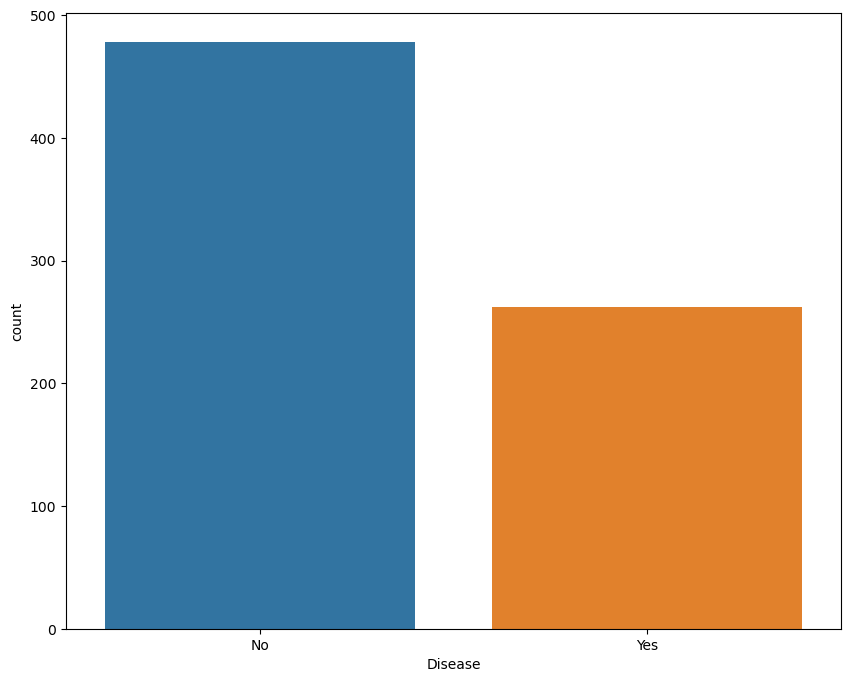

In [10]:
# Use bar plots in order to compare the absences due to disease reasons
plt.figure(figsize=(10,8))
sns.countplot(data=preprocessed_data , x = 'Disease')

As we can see, the number of reasons for absence that are not listed in the ICD table is almost twice the number of listed ones 😕

In this section, we performed some simple data exploration and transformations on the initial absenteeism dataset. In the next section, we will go deeper into our data exploration and analyze some of the possible reasons for absence.

Initial Analysis of the Reason for Absence
Let's start with a simple analysis of the Reason for absence column. We will try to address questions such as, what is the most common reason for absence? 🤔
Does being a drinker or smoker have some effect on the causes?
Does the distance to work have some effect on the reasons?
Starting with these types of questions is often important when performing data analysis, as this is a good way to obtain confidence and understanding of the data.

The first thing we are interested in is the overall distribution of the absence reasons in the data—that is, how many entries we have for a specific reason for absence in our dataset. We can easily address this question by using the countplot() function from the seaborn package

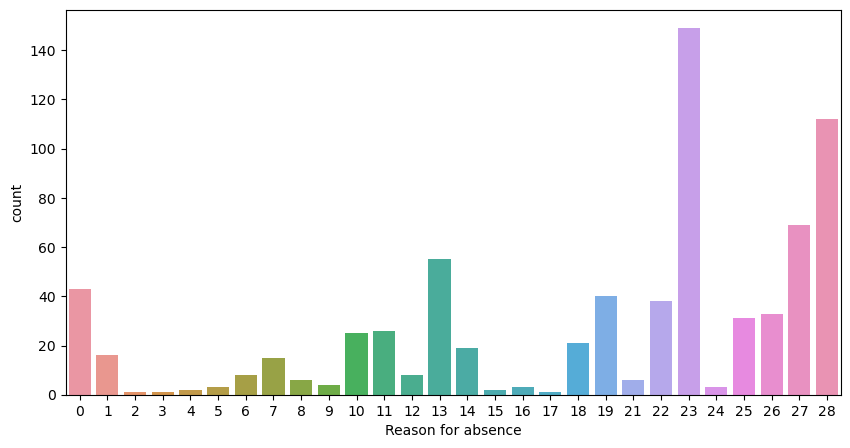

In [11]:
# get the number of entries for each reason for absence
plt.figure(figsize=(10,5))
ax = sns.countplot(data = preprocessed_data , x= 'Reason for absence')
ax.set_label('Number of entries per reson absence')

we can assert that the most frequent reasons for absence are related to

medical consultations (23), dental consultations (28), and physiotherapy (27). On the other hand, the most frequent reasons for absence encoded in the ICD encoding are related to diseases of the
musculoskeletal system and connective tissue (13) and injury, poisoning, and certain other consequences of external causes (19)
In order to perform a more accurate and in-depth analysis of the data, we will investigate the impact of the various features on the Reason for absence and Absenteeism in hours columns in the following sections. First, we will analyze the data on social drinkers and smokers in the next section.

## Analysis of Social Drinkers and Smokers
Let's begin with an analysis of the impact of being a drinker or smoker on employee absenteeism. As smoking and frequent drinking have a negative impact on health conditions, we would expect that certain diseases are more frequent in smokers and drinkers than others. Note that in the absenteeism dataset, 56% of the registered employees are drinkers, while only 7% are smokers.



<Axes: xlabel='Reason for absence', ylabel='count'>

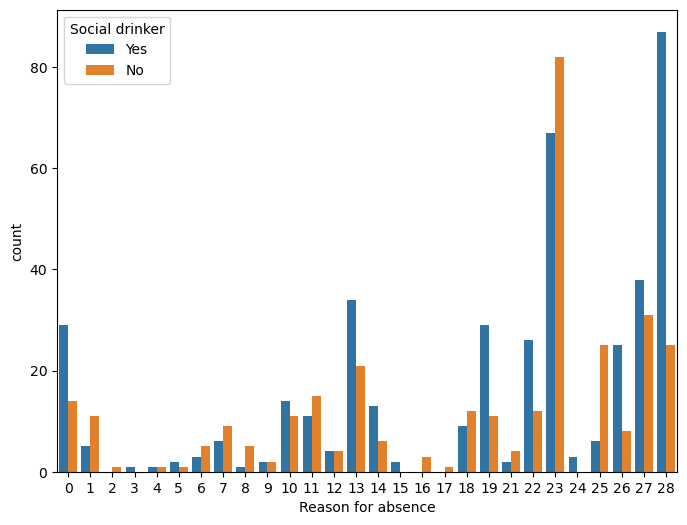

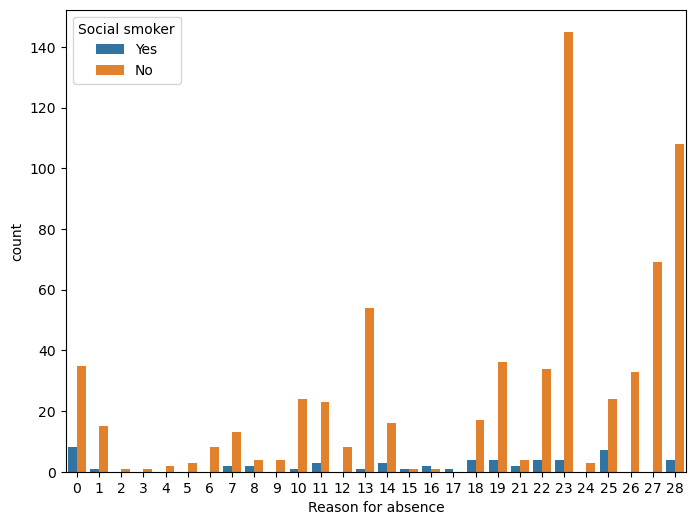

In [12]:
# plot reasons for absence against being a social drinker/smoker
plt.figure(figsize=(8,6))
sns.countplot(data = preprocessed_data , x= 'Reason for absence',\
              hue = 'Social drinker' , hue_order=['Yes','No'])
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", \
              hue="Social smoker", hue_order=["Yes", "No"])

In [13]:
print(preprocessed_data['Social drinker'].value_counts(normalize=True))
print(preprocessed_data['Social smoker'].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


In [14]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data['Social drinker'].value_counts(normalize=True)['Yes']
smoker_prob = preprocessed_data['Social smoker'].value_counts(normalize=True)['Yes']

print(f'P(social drinker) = {drinker_prob : 0.3f} | P(social smoker) = {smoker_prob :0.3f}' )


P(social drinker) =  0.568 | P(social smoker) = 0.073


In [15]:
# create mask for social drinkers/smokers
drinker_mask = preprocessed_data['Social drinker']=='Yes'
smoker_mask = preprocessed_data['Social smoker']=='Yes'


In [16]:
total_entries = preprocessed_data.shape[0]

absence_drinker_prob = preprocessed_data['Reason for absence'][drinker_mask].value_counts()/total_entries
absence_smoker_prob = preprocessed_data['Reason for absence'][smoker_mask].value_counts()/total_entries

In [17]:
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob['P(Absence | social drinker)'] = absence_drinker_prob/drinker_prob
cond_prob['P(Absence | social smoker)'] = absence_smoker_prob/smoker_prob

Text(0, 0.5, 'Conditional probability')

<Figure size 640x480 with 0 Axes>

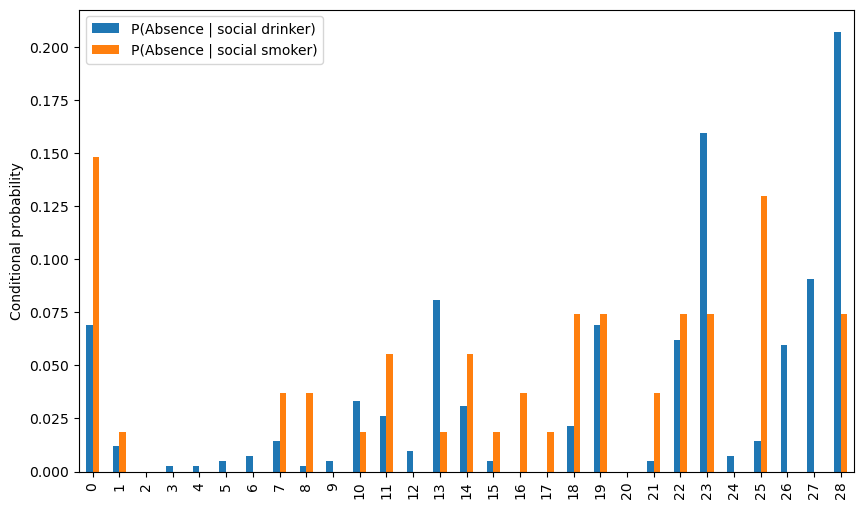

In [18]:
plt.figure()
ax = cond_prob.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")

In [19]:
# compute reason for absence probabilities
absence_prob = preprocessed_data['Reason for absence'].value_counts(normalize=True)

Text(0, 0.5, 'Conditional probability')

<Figure size 640x480 with 0 Axes>

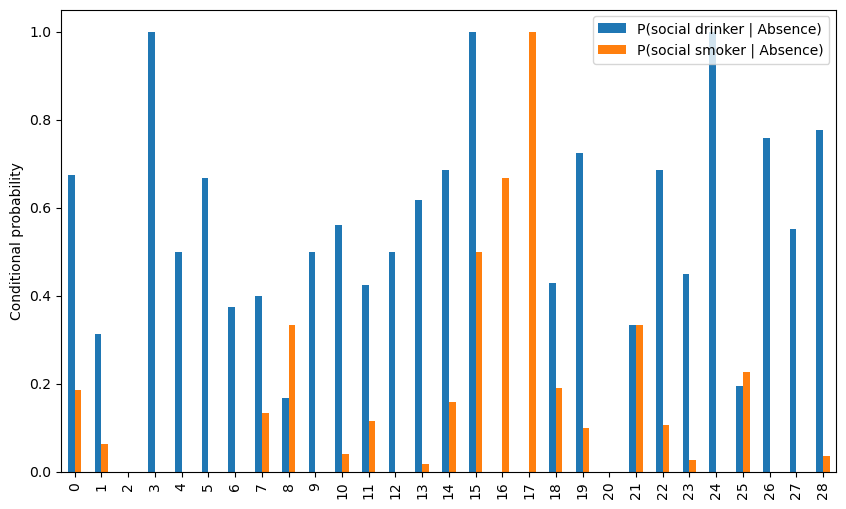

In [20]:
cond_prob_drinker_smoker = pd.DataFrame(index = range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] =\
    cond_prob['P(Absence | social drinker)'] * drinker_prob/absence_prob

cond_prob_drinker_smoker["P(social smoker | Absence)"] = \
cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")

<Axes: xlabel='Social smoker', ylabel='Absenteeism time in hours'>

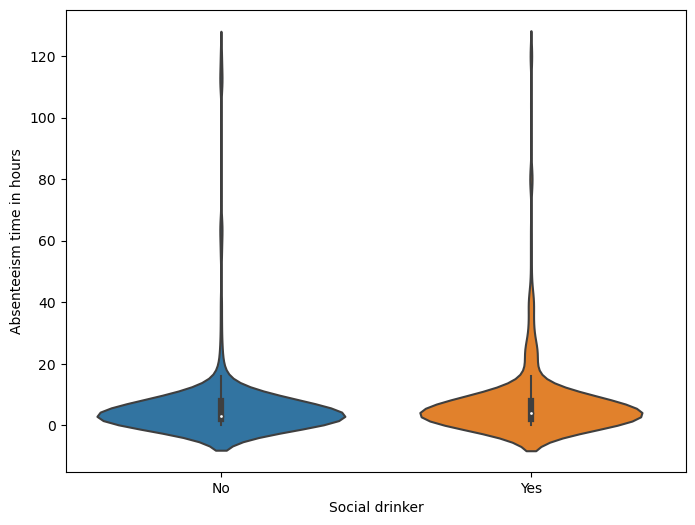

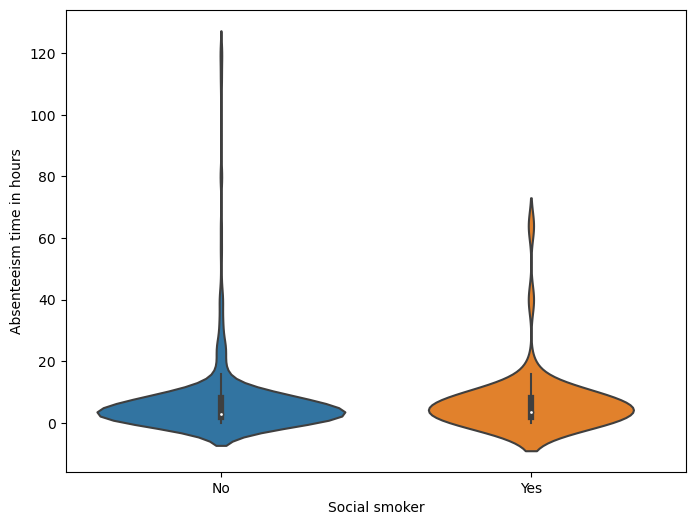

In [21]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(data=preprocessed_data , x='Social drinker' , y='Absenteeism time in hours'\
               ,order = ['No','Yes'])
plt.figure(figsize=(8,6))
sns.violinplot(data=preprocessed_data , x='Social smoker' , y='Absenteeism time in hours'\
               ,order = ['No','Yes'])

In [22]:
from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"

# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data['Social drinker']=='Yes'
hours_drinkers = preprocessed_data.loc[drinker_mask,hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask,col]

drinkers_test = ttest_ind(hours_drinkers,hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value: {drinkers_test[1]}")

Statistic value: 1.7713833295243993, p-value: 0.0769096182829465


In [23]:
# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data\
                    .loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, \
p-value: {smokers_test[1]}")


Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


In [24]:
# perform Kolmogorov-Smirnov test for comparing the distributions
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers,hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, \
pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, \
pvalue={ks_smokers[1]:.3f}")


Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


In [25]:
"""
define function for computing the BMI category, based on BMI value
"""
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category


# compute BMI category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"].apply(get_bmi_category)


<Axes: xlabel='BMI category', ylabel='count'>

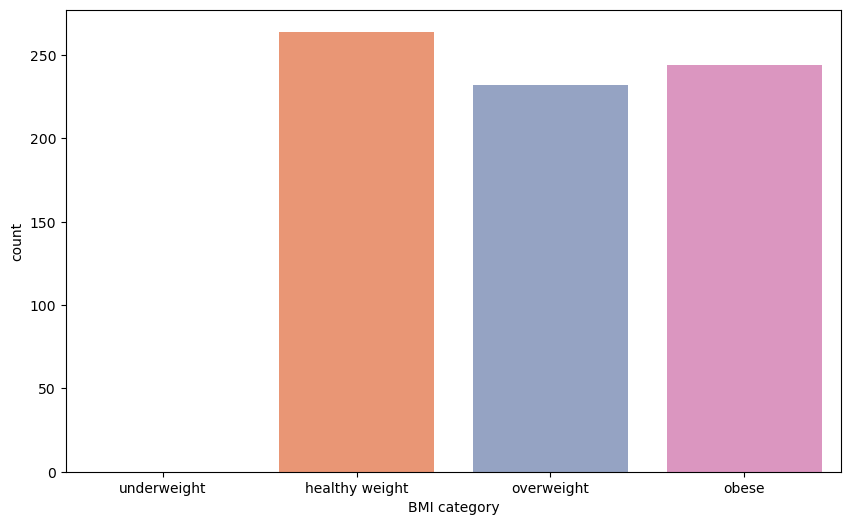

In [26]:
# plot number of entries for each category
plt.figure(figsize=(10, 6))
sns.countplot(data=preprocessed_data, x='BMI category', \
              order=["underweight", "healthy weight", "overweight", "obese"], \
              palette="Set2")

Text(0.5, 0, 'Number of employees')

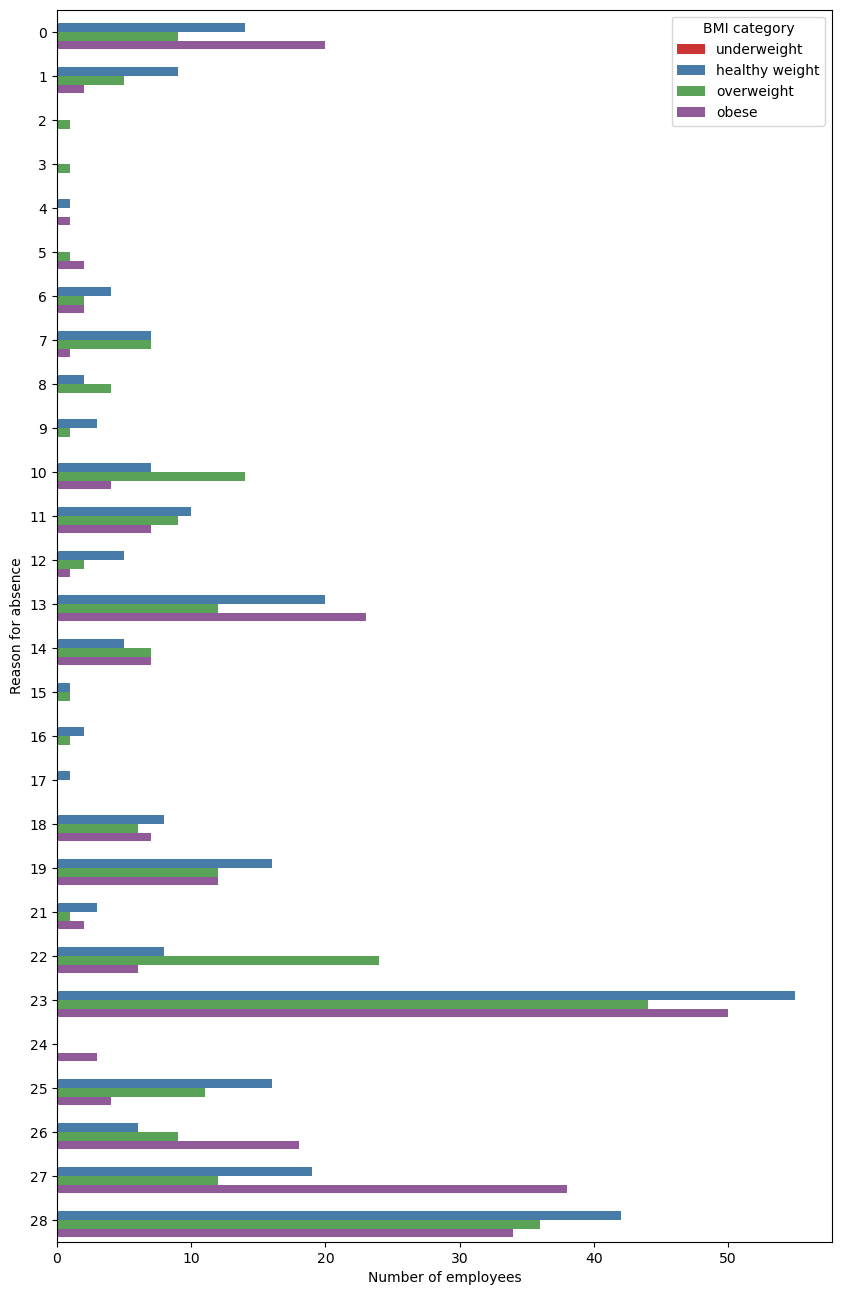

In [27]:
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=preprocessed_data, y="Reason for absence", hue="BMI category", 
                   hue_order=["underweight", "healthy weight", "overweight", "obese"], \
                   palette="Set1")
ax.set_xlabel("Number of employees")


<Axes: xlabel='BMI category', ylabel='Absenteeism time in hours'>

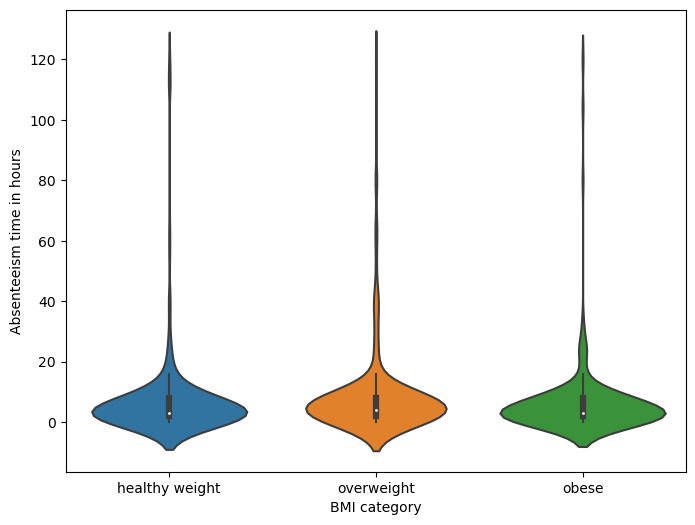

In [28]:
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", \
               y="Absenteeism time in hours", \
               data=preprocessed_data, \
               order=["healthy weight", "overweight", "obese"])


## Age and Education Factors
Age and education may also influence employees' absenteeism. For instance, older employees might need more frequent medical treatment, while employees with higher education degrees, covering positions of higher responsibility, might be less prone to being absent

First, let's investigate the correlation between age and absence hours. We will create a regression plot, in which we'll plot the Age column on the x axis and Absenteeism time in hours on the y axis. We'll also include the Pearson's correlation coefficient and its p-value, where the null hypothesis is that the correlation coefficient between the two features is equal to zero:

Text(0.5, 1.0, 'Correlation=0.066 | p-value=0.074')

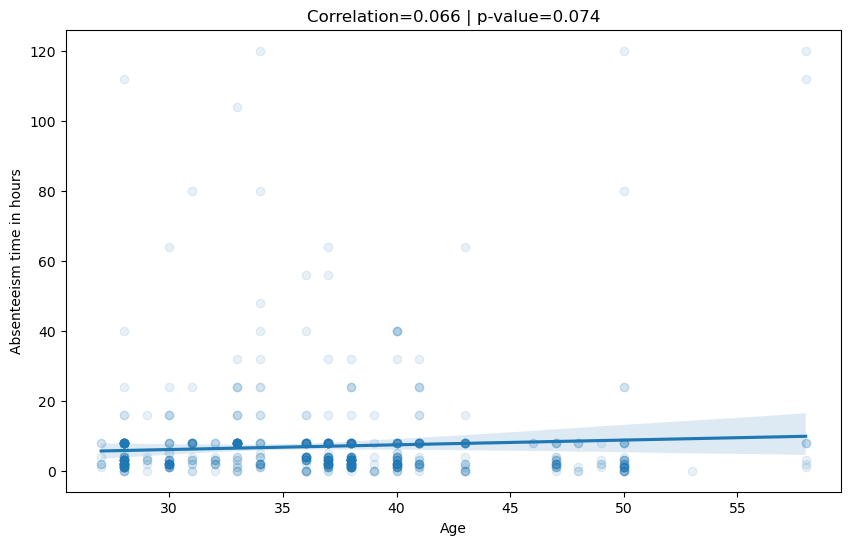

In [29]:
from scipy.stats import pearsonr
# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data['Age'],preprocessed_data['Absenteeism time in hours'])

"""
create regression plot and add correlation coefficient in the title
"""
plt.figure(figsize=(10, 6))
ax = sns.regplot(data=preprocessed_data,x='Age',y='Absenteeism time in hours',\
                 scatter_kws={'alpha':0.1})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}")


## Investigating the Impact of Age on Reason for Absence

<Axes: xlabel='Disease', ylabel='Age'>

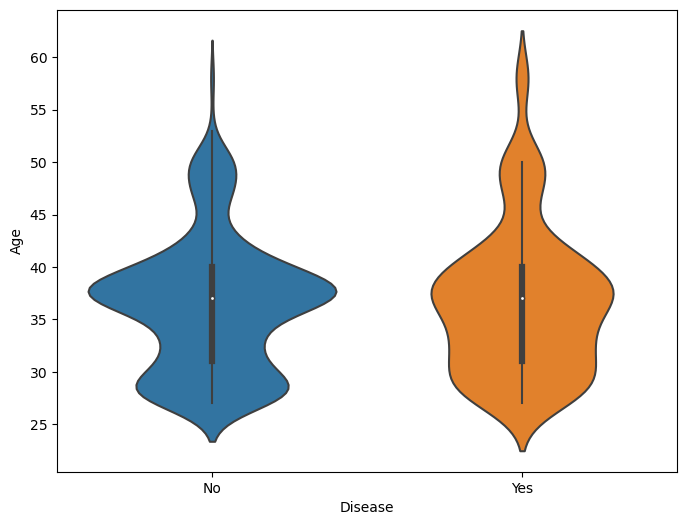

In [30]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x="Disease", y="Age", data=preprocessed_data)

In [31]:
"""
get Age entries for employees with Disease == Yes and Disease == No
"""
disease_mask = preprocessed_data["Disease"] == "Yes"
disease_ages = preprocessed_data["Age"][disease_mask]
no_disease_ages = preprocessed_data["Age"][~disease_mask]

# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: \
statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

#test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: \
statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")


Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


<Axes: xlabel='Reason for absence', ylabel='Age'>

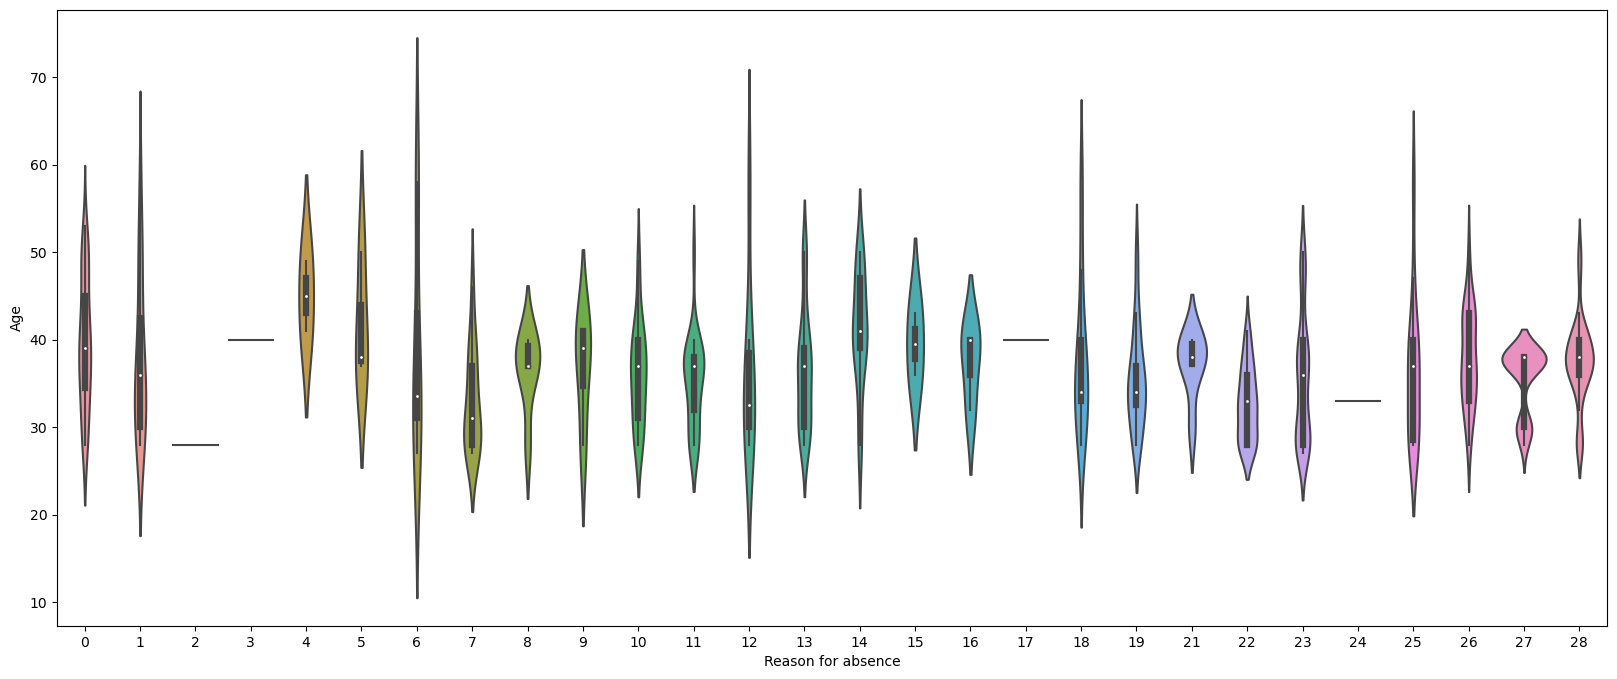

In [32]:
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", \
 data=preprocessed_data)

## Investigating the Impact of Education on Reason for Absence

In [33]:
# compute percentage of employees per education level
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
counts = preprocessed_data["Education"].value_counts()
percentages = preprocessed_data["Education"].value_counts(normalize=True)
for educ_type in education_types:
     print(f"Education type: {educ_type:12s} \
    | Counts : {counts[educ_type]:6.0f} \
    | Percentage: {100*percentages[educ_type]:4.1f}")

Education type: high_school      | Counts :    611     | Percentage: 82.6
Education type: graduate         | Counts :     46     | Percentage:  6.2
Education type: postgraduate     | Counts :     79     | Percentage: 10.7
Education type: master_phd       | Counts :      4     | Percentage:  0.5


<Axes: xlabel='Education', ylabel='Absenteeism time in hours'>

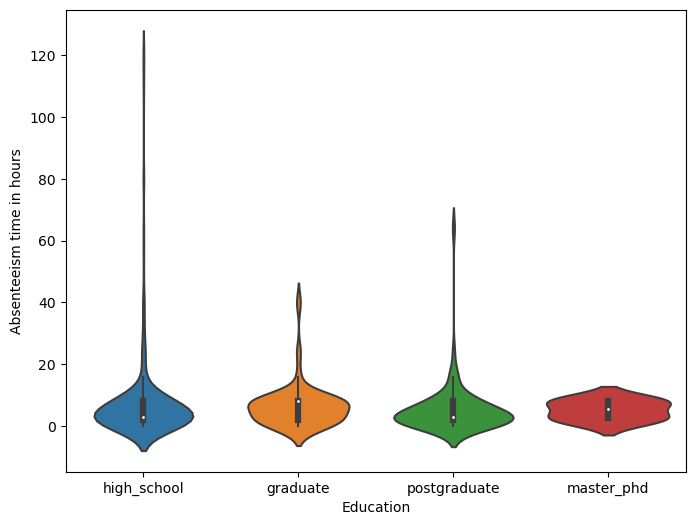

In [34]:
# distribution of absence hours, based on education level
plt.figure(figsize=(8,6))
sns.violinplot(x="Education", y="Absenteeism time in hours",\
               data=preprocessed_data, \
               order=["high_school", "graduate", \
                      "postgraduate", "master_phd"])


In [35]:
# compute mean and standard deviation of absence hours
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
for educ_type in education_types:
    mask = preprocessed_data["Education"] == educ_type
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {educ_type:12s} | Mean : {mean:.03f} \
    | Stddev: {stddev:.03f}")


Education type: high_school  | Mean : 7.190     | Stddev: 14.259
Education type: graduate     | Mean : 6.391     | Stddev: 6.754
Education type: postgraduate | Mean : 5.266     | Stddev: 7.963
Education type: master_phd   | Mean : 5.250     | Stddev: 3.202


<Axes: xlabel='count', ylabel='Reason for absence'>

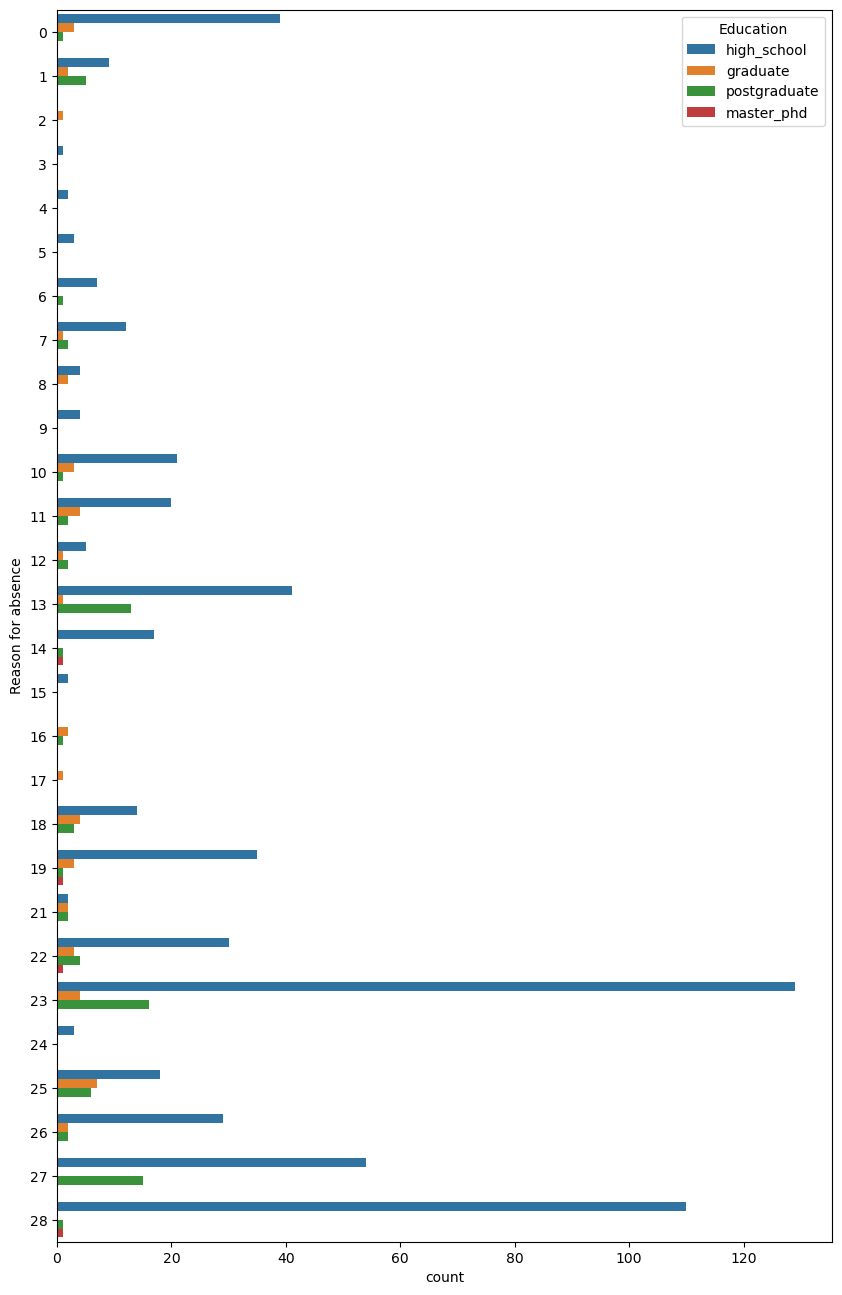

In [36]:
plt.figure(figsize=(10, 16))
sns.countplot(data=preprocessed_data, y="Reason for absence",\
              hue="Education", \
              hue_order=["high_school", "graduate", \
                         "postgraduate", "master_phd"])


In [37]:
"""
define threshold for extreme hours of absenteeism and get total number 
of entries
"""
threshold = 40
total_entries = len(preprocessed_data)

# find entries with Education == high_school
high_school_mask = preprocessed_data["Education"] == "high_school"
# find entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data["Absenteeism time in hours"] > threshold

# compute probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask]) / total_entries

# compute probability of having more than high school degree
prob_graduate = len(preprocessed_data[~high_school_mask]) /total_entries

"""
compute probability of having high school and being absent for more 
than "threshold" hours
"""

prob_extreme_high_school = len(preprocessed_data\
                               [high_school_mask & extreme_mask])/total_entries

prob_extreme_graduate = len(preprocessed_data\
                            [~high_school_mask & extreme_mask])/total_entries

# compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school/ prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate

print(f"P(extreme absence | degree = high_school) = \
{100*cond_prob_extreme_high_school:3.2f}%")
print(f"P(extreme absence | degree != high_school) = \
{100*cond_prob_extreme_graduate:3.2f}%")
preprocessed_data.head().T

P(extreme absence | degree = high_school) = 2.29%
P(extreme absence | degree != high_school) = 0.78%


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


## Transportation Costs and Distance to Work Factors
Two possible indicators for absenteeism may also be the distance between home and work (the Distance from Residence to Work column) and transportation costs (the Transportation expense column). Employees who have to travel longer, or whose costs for commuting to work are high, might be more prone to absenteeism

First, let's start our analysis by plotting the previously mentioned columns (Distance from Residence to Work and Transportation expense) against the Absenteeism time in hours column:



<Figure size 1000x600 with 0 Axes>

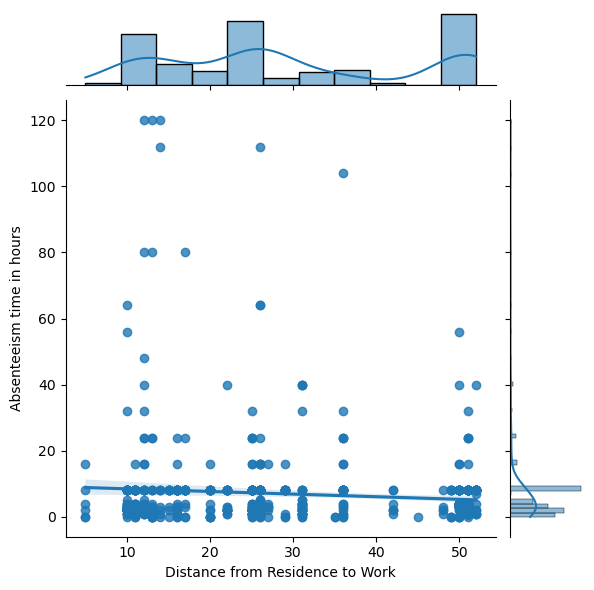

<Figure size 1000x600 with 0 Axes>

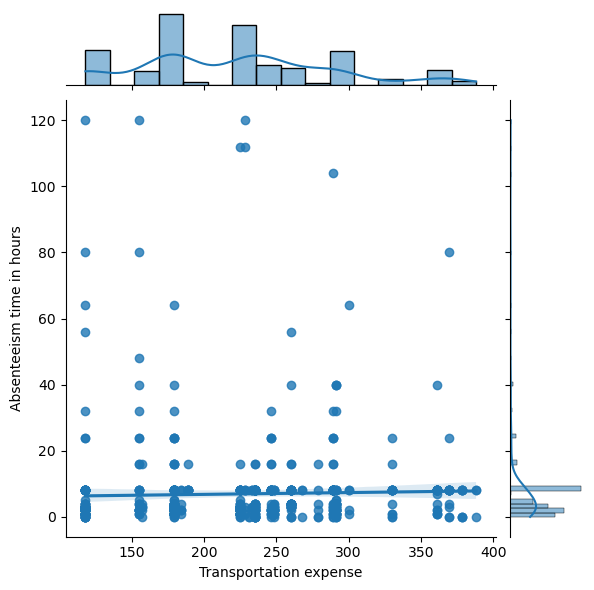

In [38]:
# plot transportation costs and distance to work against hours
plt.figure(figsize=(10, 6))
sns.jointplot(x="Distance from Residence to Work", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")
plt.figure(figsize=(10, 6))
sns.jointplot(x="Transportation expense", \
              y="Absenteeism time in hours", \
              data=preprocessed_data, kind="reg")

<Figure size 1000x600 with 0 Axes>

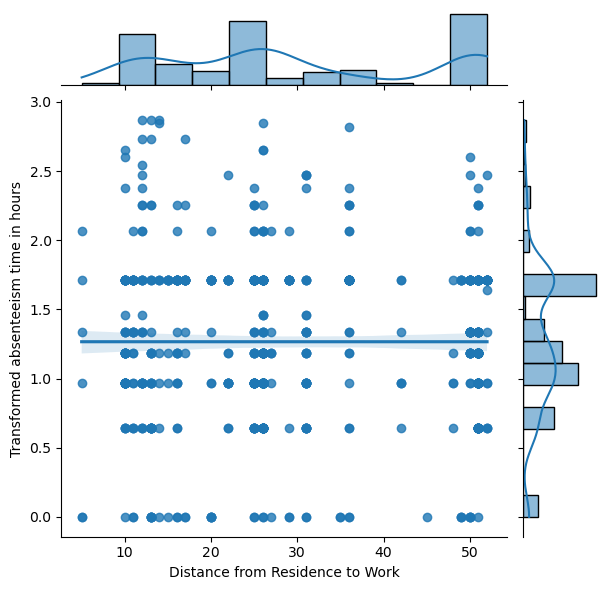

<Figure size 1000x600 with 0 Axes>

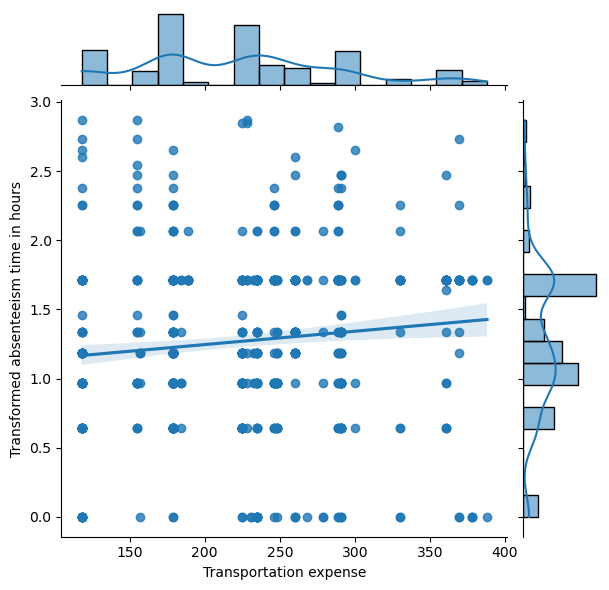

In [39]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson
hours = yeojohnson(preprocessed_data\
                   ["Absenteeism time in hours"].apply(float))

distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",\
 "Transformed absenteeism time in hours")

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", \
 "Transformed absenteeism time in hours")

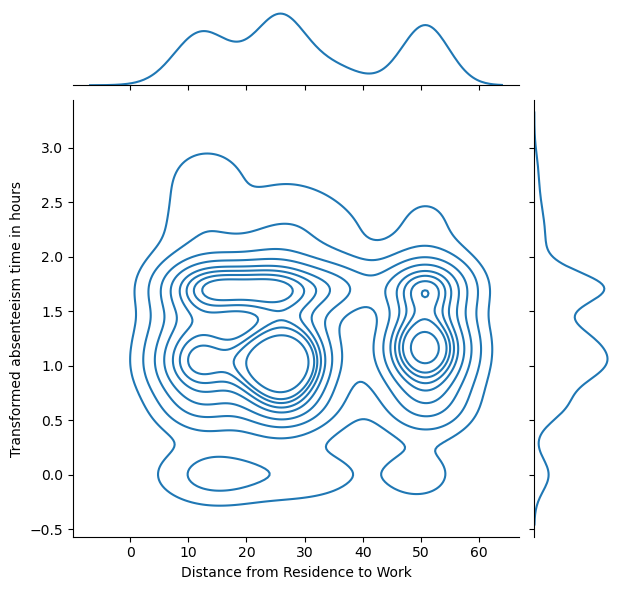

<Figure size 1000x600 with 0 Axes>

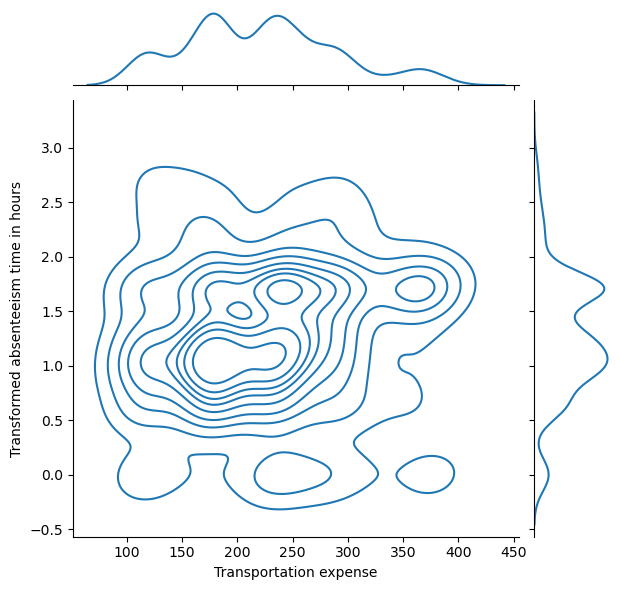

In [40]:
ax = sns.jointplot(x=distances, y=hours[0], kind="kde")

ax.set_axis_labels("Distance from Residence to Work",\
 "Transformed absenteeism time in hours")

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde")
ax.set_axis_labels("Transportation expense", \
 "Transformed absenteeism time in hours")

In [41]:
# investigate correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, \
pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, \
pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002


## Temporal Factors
Factors such as day of the week and month may also be indicators for absenteeism. For instance, employees might prefer to have their medical examinations on Friday when the workload is lower, and it is closer to the weekend. In this section, we will analyze the impact of the Day of the week and Month of absence columns, and their impact on the employees' absenteeism.
# count entries per day of the week and month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, \
                   x='Day of the week', \
                   order=["Monday", "Tuesday", \
                          "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, \
                   x='Month of absence', \
                   order=["January", "February", "March", \
                          "April", "May", "June", "July", \
"August", "September", "October", \
"November", "December", "Unknown"])
ax.set_title("Number of absences per month")


Text(0.5, 1.0, 'Number of absences per month')

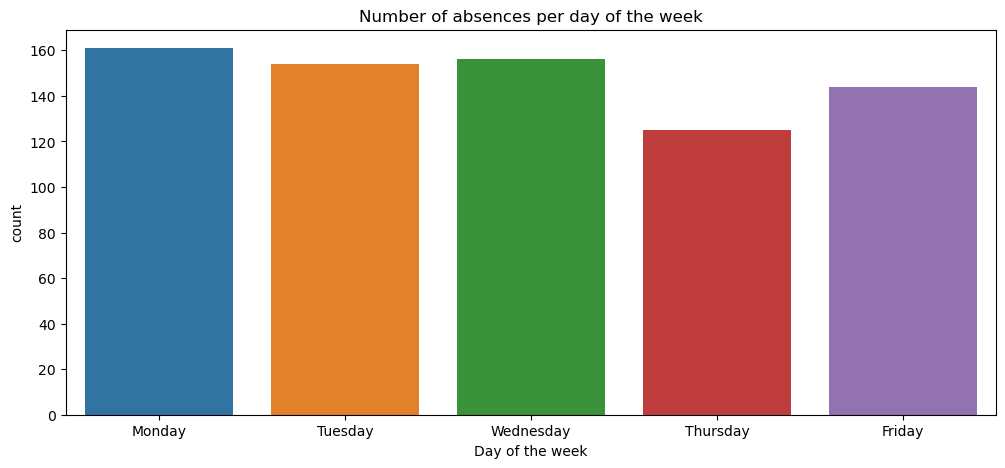

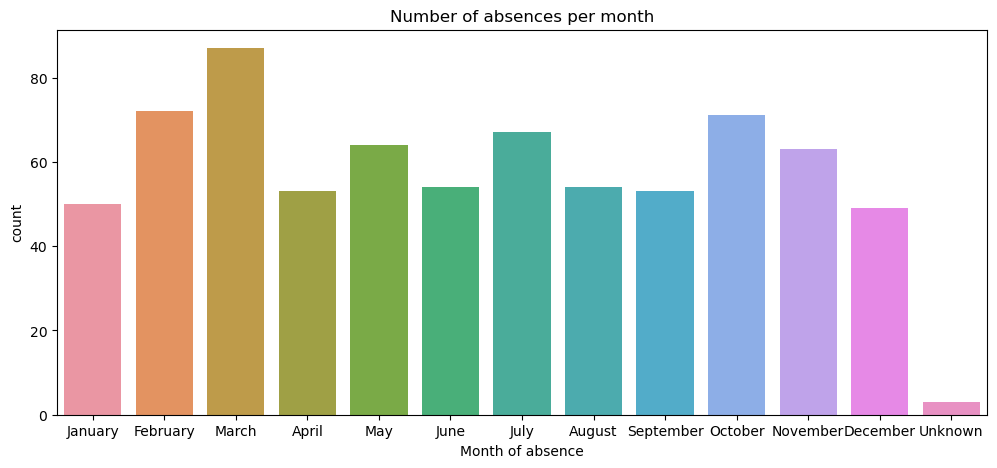

In [42]:
# count entries per day of the week and month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, \
                   x='Day of the week', \
                   order=["Monday", "Tuesday", \
                          "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, \
                   x='Month of absence', \
                   order=["January", "February", "March", \
                          "April", "May", "June", "July", \
"August", "September", "October", \
"November", "December", "Unknown"])
ax.set_title("Number of absences per month")


## Investigating Absence Hours, Based on the Day of the Week and the Month of the Year

<Axes: xlabel='Month of absence', ylabel='Absenteeism time in hours'>

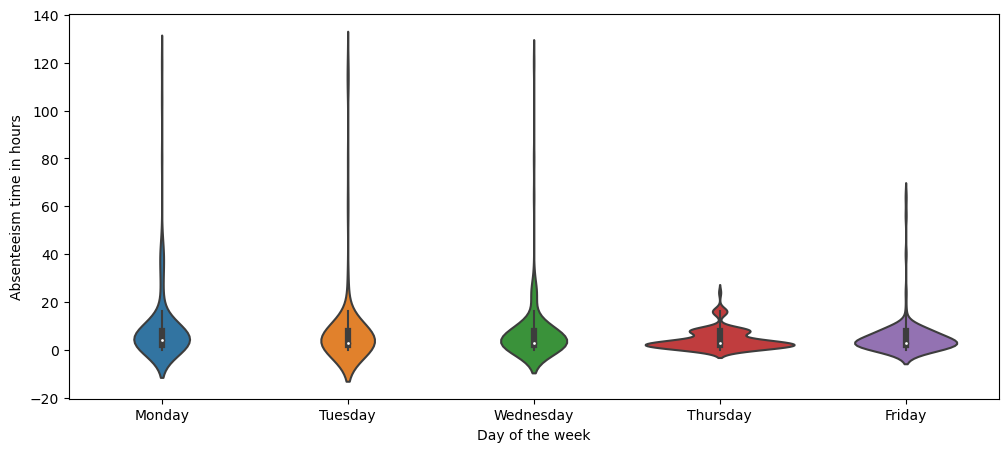

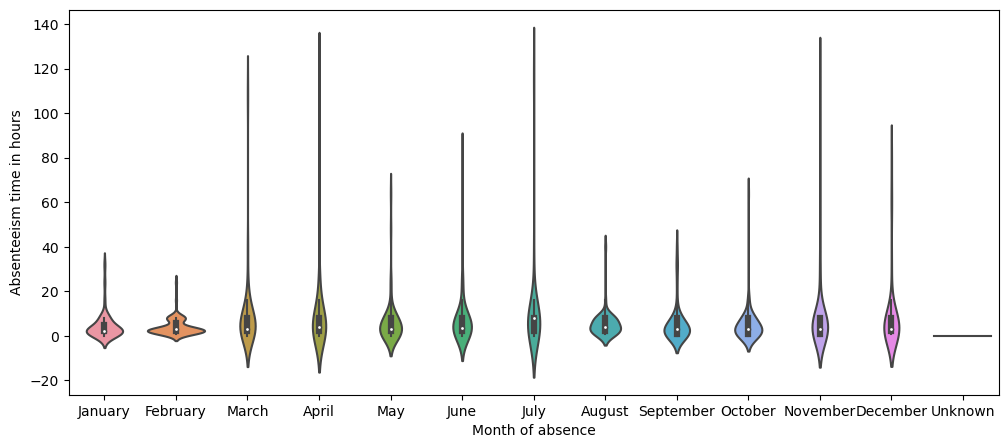

In [43]:
# analyze average distribution of absence hours 
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", \
               y="Absenteeism time in hours",\
               data=preprocessed_data, \
               order=["Monday", "Tuesday", \
                      "Wednesday", "Thursday", "Friday"])

plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", \
               y="Absenteeism time in hours",\
               data=preprocessed_data, \
               order=["January", "February", \
                      "March", "April", "May", "June", "July",\
"August", "September", "October", \
"November", "December", "Unknown"])

In [44]:
"""
compute mean and standard deviation of absence hours per day of the 
week
"""
dows = ["Monday", "Tuesday", "Wednesday", \
        "Thursday", "Friday"]
for dow in dows:
    mask = preprocessed_data["Day of the week"] == dow
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} \
| Stddev: {stddev:.03f}")

Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


In [45]:
"""
compute mean and standard deviation of absence hours per day of the 
month
"""
months = ["January", "February", "March", "April", "May", \
          "June", "July", "August", "September", "October", \
          "November", "December"]
for month in months:
    mask = preprocessed_data["Month of absence"] == month
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} \
| Stddev: {stddev:8.03f}")

Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


In [46]:
# perform statistical test for avg duration difference
thursday_mask = preprocessed_data["Day of the week"] == "Thursday"
july_mask = preprocessed_data["Month of absence"] == "July"

thursday_data = preprocessed_data["Absenteeism time in hours"][thursday_mask]
no_thursday_data = preprocessed_data["Absenteeism time in hours"][~thursday_mask]

july_data = preprocessed_data["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data["Absenteeism time in hours"][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f"Thursday test result: statistic={thursday_res[0]:.3f}, \
pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, \
pvalue={july_res[1]:.3f}")


Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


<Axes: >

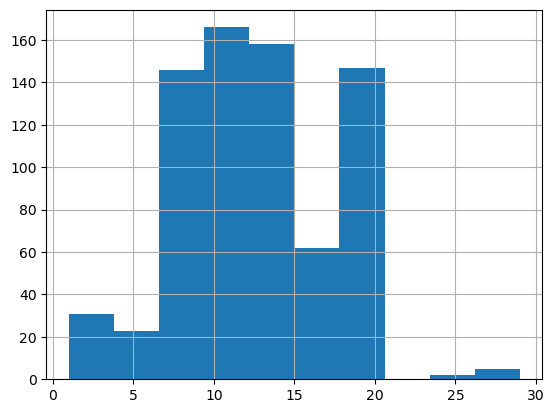

In [47]:
preprocessed_data.head().T
preprocessed_data["Service time"].hist()

Since the p-values from both the statistical tests are below the critical value of 0.05, we can conclude the following: the week. Absences on Thursday have a shorter duration, on average.

There is a statistically significant difference between Thursdays and other days of
Absences during July are the longest over the year. Also, in this case, we can reject the null hypothesis of having no difference
From the analysis we've performed in this exercise, we can conclude that our initial observations about the difference in absenteeism during the month of July and on Thursdays are correct. Of course, we cannot claim that this is the cause, but only state that certain trends exist in the data.

